In [1]:
# Packages
import h5py
import numpy as np
from amuse.units import units
import matplotlib.pyplot as plt

path = '/home/astrobrez/Amuse-env/amuse-project/data/'

In [2]:
def plot_moon(moon, tidal=False, kozai=False):
    
    if kozai:
        name = 'kozai.hdf5'
    if tidal:
        name = 'tidal.hdf5'
    
    if moon=='io':
        res = h5py.File(path+'io_'+ name)
    if moon=='eu':
        res = h5py.File(path+'eu_'+ name)
    if moon=='ga':
        res = h5py.File(path+'ga_'+ name)
    if moon=='ca':
        res = h5py.File(path+'ca_'+ name)

    ecc = res['ecc'][:]
    inc = res['inc'][:]
    sma = res['sma'][:]
    time_range = res['time'][:]

    plt.rcParams.update({'font.size': 20})
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=[20, 15], tight_layout=True)
    colours = ['r', 'g', 'b', 'm']

    ax1.plot(time_range, inc, color=colours[0], label=moon)   
    ax1.set_ylabel('Inc [deg]')
    ax1.set_xlabel('t [yr]')
    ax1.legend()

    ax2.plot(time_range, ecc, color=colours[1], label=moon)   
    ax2.set_ylabel('Ecc')
    ax2.set_xlabel('t [yr]')
    ax2.legend()

    ax3.plot(time_range, sma, color=colours[2], label=moon)   
    ax3.set_ylabel('SMA')
    ax3.set_xlabel('t [yr]')
    ax3.legend()
    
    porb = np.array(sma) * (1-np.array(ecc))
    ax4.plot(time_range, porb, color=colours[3], label=moon)
    ax4.set_ylabel('Periapsis')
    ax4.set_xlabel('t [yr]')

    res.close()
    plt.show()

In [3]:
#plot_moon('io', tidal=False, kozai=True)

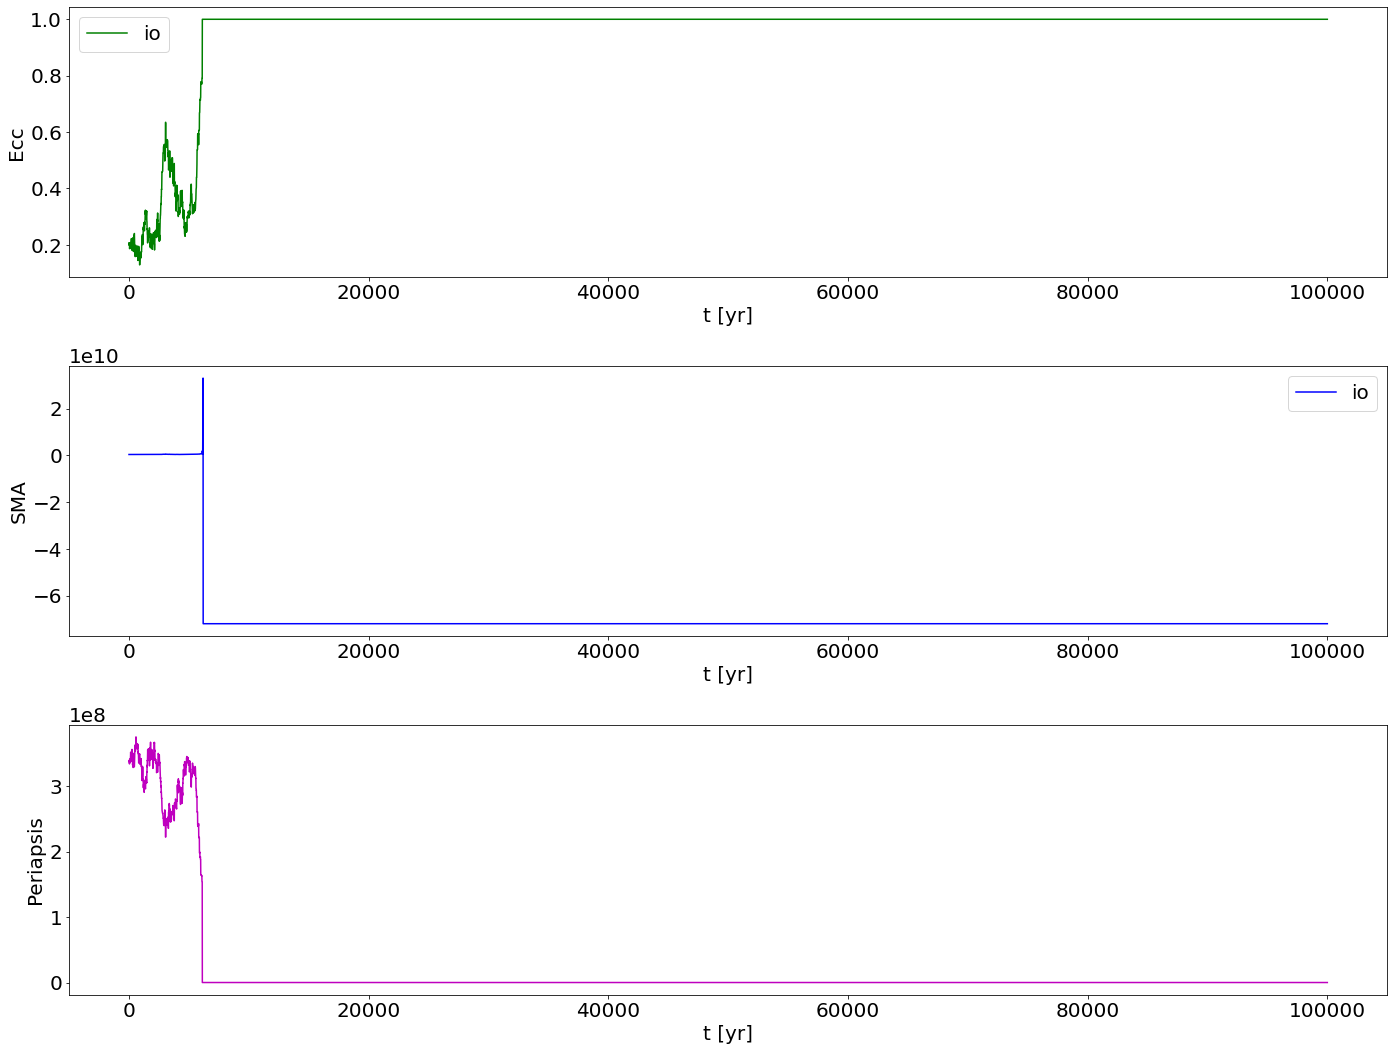

In [25]:
path = '/home/astrobrez/Amuse-env/amuse-project/small_tsteps/small_tstep.hdf5'

res = h5py.File(path)

moon = 'io'
ecc = res['ecc'][:]
sma = res['sma'][:]
time_range = res['time'][:]

plt.rcParams.update({'font.size': 20})
fig, (ax2, ax3, ax4) = plt.subplots(3, 1, figsize=[20, 15], tight_layout=True)
colours = ['r', 'g', 'b', 'm']

ax2.plot(time_range, ecc, color=colours[1], label=moon)   
ax2.set_ylabel('Ecc')
ax2.set_xlabel('t [yr]')
ax2.legend()

ax3.plot(time_range, sma, color=colours[2], label=moon)   
ax3.set_ylabel('SMA')
ax3.set_xlabel('t [yr]')
ax3.legend()

porb = np.array(sma) * (1-np.array(ecc))
ax4.plot(time_range, porb, color=colours[3], label=moon)
ax4.set_ylabel('Periapsis')
ax4.set_xlabel('t [yr]')

res.close()
plt.show()